In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder




# Data Cleaning for Housing Listings

This notebook is dedicated to cleaning the housing dataset. The following tasks are performed:
1. Loading the dataset.
5. Renaming columns for clarity.


In [3]:
housing_data_uncleaned = pd.read_csv("data/PrimaryDataset-MLS-RentalProperties.csv")
print(housing_data_uncleaned.shape) #
housing_data_uncleaned.info()

(1749, 77)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 77 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   List Number                           1749 non-null   object 
 1   Agency Phone                          1736 non-null   object 
 2   Listing Agent                         1749 non-null   object 
 3   Co-Listing Agent                      285 non-null    object 
 4   Property Type                         1749 non-null   object 
 5   Card Format                           1749 non-null   object 
 6   Book Section                          1749 non-null   object 
 7   Property Sub Type                     1749 non-null   object 
 8   Listing Contract Date                 1749 non-null   object 
 9   Back on Market Date                   78 non-null     object 
 10  Status                                1749 non-null   object 
 11  Status

In [4]:
housing_data_uncleaned.columns

Index(['List Number', 'Agency Phone', 'Listing Agent', 'Co-Listing Agent',
       'Property Type', 'Card Format', 'Book Section', 'Property Sub Type',
       'Listing Contract Date', 'Back on Market Date', 'Status',
       'Status Change Timestamp', 'Original List Price', 'List Price',
       'Living Area Source', 'MLS Area Major', 'Lock Box Number',
       'Street Direction Prefix', 'Street Direction Suffix',
       'Non-Representative Compensation Type', 'City', 'State', 'County',
       'Country', 'Postal Code', 'Stories Total', 'Stories', 'Latitude',
       'Longitude', 'GeoID', 'Living Area', 'Year Built', 'Direction Faces',
       'Lot Size Dimensions', 'Bedrooms Total', 'Bathrooms Total',
       'Bathrooms Full', 'Bathrooms Half', 'Parcel Number', 'Owner Name',
       'mod_timestamp', 'Association Fee Frequency', 'Occupant Type',
       'Listing Agreement', 'Association Fee 2 Frequency', 'Listing Service',
       'Lease Term', 'Association Fee', 'Building Area Total', 'Garage Sp

In [5]:
relevant_columns = [
    'List Price', 'Bedrooms Total', 'Bathrooms Total', 'Living Area', 
    'MLS Area Major', 'Year Built', 
    'Lot Size Acres', 'Days on Market', 'Non-Representative Compensation',
    'Waterfront YN', 'Garage YN', 'Stories Total', 'Stories', 'Bedrooms Total', 'Bathrooms Total',
    'Bathrooms Full', 'Bathrooms Half', 'Garage YN', 'Garage Spaces', 'Original List Price', 'Latitude', 'Longitude', 'Rooms', 'Features'
]

numerical_columns = [
    'List Price', 'Bedrooms Total', 'Bathrooms Total', 'Living Area', 
    'MLS Area Major', 'Year Built', 
    'Lot Size Acres', 'Days on Market', 'Non-Representative Compensation',
    'Stories Total', 'Stories', 'Bedrooms Total', 'Bathrooms Total',
    'Bathrooms Full', 'Bathrooms Half', 'Garage Spaces', 'Original List Price', 'Latitude', 'Longitude'
]

# Drop the irrelevant columns
numerical_housing_data = housing_data_uncleaned[numerical_columns]



In [6]:
numerical_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   List Price                       1749 non-null   int64  
 1   Bedrooms Total                   1749 non-null   int64  
 2   Bathrooms Total                  1749 non-null   int64  
 3   Living Area                      1749 non-null   float64
 4   MLS Area Major                   1749 non-null   int64  
 5   Year Built                       1749 non-null   int64  
 6   Lot Size Acres                   1283 non-null   float64
 7   Days on Market                   1749 non-null   int64  
 8   Non-Representative Compensation  1732 non-null   float64
 9   Stories Total                    1742 non-null   float64
 10  Stories                          869 non-null    float64
 11  Bedrooms Total                   1749 non-null   int64  
 12  Bathrooms Total     

In [7]:
housing_data = numerical_housing_data.dropna()

In [8]:
housing_data

# housing_data.to_csv('data/numerical_housing_data.csv', index=False)


,List Price,Bedrooms Total,Bathrooms Total,Living Area,MLS Area Major,Year Built,Lot Size Acres,Days on Market,Non-Representative Compensation,Stories Total,Stories,Bedrooms Total,Bathrooms Total,Bathrooms Full,Bathrooms Half,Garage Spaces,Original List Price,Latitude,Longitude
24,1695,2,2,1230.0,26,2008,0.01,55,10.0,2.0,2.0,2,2,2,0.0,1.0,1725,30.284262,-81.454856
26,2700,5,2,2498.0,14,1996,0.46,43,0.0,2.0,2.0,5,2,2,0.0,2.0,2900,30.156717,-81.629576
37,2500,5,2,1990.0,135,1980,0.27,53,100.0,1.0,1.0,5,2,2,0.0,2.0,2600,30.160414,-81.744717
39,4425,3,3,2442.0,43,2012,0.10,23,1.0,2.0,2.0,3,3,2,1.0,2.0,4425,30.341041,-81.461648
40,4500,3,2,1426.0,212,1979,0.14,21,1.0,2.0,2.0,3,2,2,0.0,1.0,4500,30.266153,-81.398813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,1400,2,3,1176.0,63,2005,0.04,38,0.0,2.0,2.0,2,3,2,1.0,1.0,1450,30.252827,-81.767690
1728,2400,3,2,1852.0,43,2001,0.18,39,10.0,1.0,1.0,3,2,2,0.0,2.0,2400,30.352380,-81.471849
1730,2600,4,3,2035.0,304,2021,0.17,37,10.0,2.0,2.0,4,3,2,1.0,2.0,2700,30.027625,-81.522525
1732,1620,2,3,1346.0,304,2006,0.05,37,20.0,2.0,2.0,2,3,2,1.0,1.0,1620,30.050709,-81.496730


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
x_scaled = scaler.fit_transform(housing_data)

pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(x_scaled)

model1 = IsolationForest(n_estimators=100, max_samples='auto', contamination='auto', random_state=12)

model1.fit(x_pca)

predict = model1.predict(x_pca)
anomalies = x_scaled[predict == -1]

In [9]:
# Step 2: Add the Time Limit Flag (0 = 90 days or less, 1 = more than 90 days)
housing_data['Time Limit Flag'] = housing_data['Days on Market'].apply(lambda x: 1 if x > 90 else 0)

# Step 3: Save the updated dataset to a new CSV file
housing_data.to_csv('updated_housing_data_with_time_limit_flag.csv', index=False)

# Step 4: Verify the first few rows of the updated dataset
print(housing_data[['Days on Market', 'Time Limit Flag']].head(10))

In [ ]:
# Step 1: Fit the PCA as before
pca = PCA(n_components=0.95)  # Retaining 95% of variance
x_pca = pca.fit_transform(x_scaled)

# Step 2: Create a DataFrame for the principal components
pca_columns = [f'PC{i+1}' for i in range(x_pca.shape[1])]
pca_df = pd.DataFrame(x_pca, columns=pca_columns)

# Step 3: Get the contributions of each original feature to each principal component
loadings = pca.components_.T  # Transpose to get original features as rows
contributions_df = pd.DataFrame(loadings, index=numerical_columns, columns=pca_columns)

# Step 4: Get the top contributing feature for each principal component (for labeling purposes)
top_features_per_pc = contributions_df.abs().idxmax()

# Step 5: Create a box plot and label each principal component by its strongest contributing original feature
plt.figure(figsize=(15, 10))
sns.boxplot(data=pca_df)

# Rotate the text diagonally and align it so it reads from top to bottom
plt.xticks(range(len(top_features_per_pc)), top_features_per_pc, rotation=45, ha="right", rotation_mode="anchor")

# Title
plt.title('Boxplot for Each Principal Component - Labeled by Top Contributing Feature')
plt.show()




In [ ]:
# Step 1: Fit the PCA as before
pca = PCA(n_components=0.95)  # Retaining 95% of variance
x_pca = pca.fit_transform(x_scaled)

# Step 2: Create a DataFrame for the principal components
pca_columns = [f'PC{i+1}' for i in range(x_pca.shape[1])]
pca_df = pd.DataFrame(x_pca, columns=pca_columns)

# Step 3: Get the contributions of each original feature to each principal component
loadings = pca.components_.T  # Transpose to get original features as rows
contributions_df = pd.DataFrame(loadings, index=numerical_columns, columns=pca_columns)

# Step 4: Get the top contributing feature for each principal component (for labeling purposes)
top_features_per_pc = contributions_df.abs().idxmax()

# Step 5: Add anomaly labels to the PCA DataFrame
pca_df['anomaly'] = predict  # Anomalies (-1) and normal points (1)

# Step 6: Parallel Coordinates Plot with PCA data and anomaly labels
plt.figure(figsize=(12, 6))
parallel_coordinates(pca_df, 'anomaly', color=['blue', 'red'])

# Step 7: Adjust the x-axis labels (principal components) with top contributing original feature names
plt.xticks(range(len(top_features_per_pc)), top_features_per_pc, rotation=45, ha="right", rotation_mode="anchor")

# Title
plt.title('Parallel Coordinates Plot for PCA-Transformed Housing Data')
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Fit the PCA as before
pca = PCA(n_components=0.95)  # Retaining 95% of variance
x_pca = pca.fit_transform(x_scaled)

# Step 2: Create a DataFrame for the principal components
pca_columns = [f'PC{i+1}' for i in range(x_pca.shape[1])]
pca_df = pd.DataFrame(x_pca, columns=pca_columns)

# Step 3: Get the contributions of each original feature to each principal component
loadings = pca.components_.T  # Transpose to get original features as rows
contributions_df = pd.DataFrame(loadings, index=numerical_columns, columns=pca_columns)

# Step 4: Get the top contributing feature for each principal component (for labeling purposes)
top_features_per_pc = contributions_df.abs().idxmax()

# Step 5: Filter the PCA data to show only anomalies (-1)
anomalous_data = pca_df[predict == -1]

# Step 6: Plot a heatmap of the anomalous entries (use PCA-transformed data)
plt.figure(figsize=(12, 8))
sns.heatmap(anomalous_data, cmap='coolwarm', annot=False, linewidths=0.5)

# Step 7: Adjust x-axis labels to reflect original features (diagonal or vertical)
plt.xticks(range(len(top_features_per_pc)), top_features_per_pc, rotation=45, ha="right", rotation_mode="anchor")

# Title
plt.title('Heatmap of Anomalous Entries Across Principal Components (PCA-Transformed Data)')
plt.show()

from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Fit DBSCAN on the PCA-transformed data
dbscan_model = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples based on your data
dbscan_labels = dbscan_model.fit_predict(x_pca)

# Step 2: Add DBSCAN cluster labels to the PCA DataFrame
pca_df['dbscan_cluster'] = dbscan_labels

# Step 3: Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['dbscan_cluster'], palette='viridis')
plt.title('DBSCAN Clustering on PCA-Transformed Data')
plt.show()

# Step 4: Cross-examine DBSCAN clusters with Isolation Forest results
pca_df['anomaly_iforest'] = predict  # Add Isolation Forest anomaly labels (-1 for anomalies, 1 for normal)

# Compare clusters and anomalies
cross_examined = pca_df[(pca_df['dbscan_cluster'] != -1) & (pca_df['anomaly_iforest'] == -1)]

print(f"Number of points flagged by both DBSCAN and Isolation Forest: {len(cross_examined)}")
cross_examined


In [ ]:
import folium
from folium.plugins import HeatMap
from math import radians, cos, sin, asin, sqrt, log

# Important locations for proximity scoring
important_coordinates = [
    {"name": "University of North Florida", "latitude": 30.2715, "longitude": -81.5094, "weight": 0.7727},  # Jacksonville, Duval County
    {"name": "Flagler College", "latitude": 29.8947, "longitude": -81.3145, "weight": 0.1182},  # St. Augustine, St. Johns County
    {"name": "St. Johns River State College", "latitude": 29.6486, "longitude": -81.6417, "weight": 0.2955},  # Palatka, Putnam County
    {"name": "Edward Waters University", "latitude": 30.3422, "longitude": -81.6794, "weight": 0.0455},  # Jacksonville, Duval County
    {"name": "Concorde Career Institute", "latitude": 30.3374, "longitude": -81.5546, "weight": 0.0227},  # Jacksonville, Duval County
    {"name": "First Coast Technical College", "latitude": 29.8922, "longitude": -81.3305, "weight": 0.0182},  # St. Augustine, St. Johns County
    {"name": "Jacksonville University", "latitude": 30.3532, "longitude": -81.6068, "weight": 0.2045},  # Jacksonville, Duval County
    {"name": "Jones Technical Institute", "latitude": 30.2449, "longitude": -81.5322, "weight": 0.0182},  # Jacksonville, Duval County
    {"name": "Tulsa Welding School", "latitude": 30.3385, "longitude": -81.5637, "weight": 0.0136},  # Jacksonville, Duval County
    {"name": "Chamberlain University-Florida", "latitude": 30.2598, "longitude": -81.5904, "weight": 0.0409},  # Jacksonville, Duval County
    {"name": "Fortis College-Orange Park", "latitude": 30.1785, "longitude": -81.7079, "weight": 0.0318},  # Orange Park, Clay County
    {"name": "Florida State College at Jacksonville", "latitude": 30.3322, "longitude": -81.6557, "weight": 1.0000},  # Jacksonville, Duval County
    {"name": "Trinity Baptist College", "latitude": 30.2395, "longitude": -81.7802, "weight": 0.0227},  # Jacksonville, Duval County
    {"name": "Keiser University", "latitude": 30.3326, "longitude": -81.6562, "weight": 0.0455},  # Jacksonville, Duval County
    {"name": "Heritage Institute", "latitude": 30.2033, "longitude": -81.5837, "weight": 0.0182},  # Jacksonville, Duval County
    {"name": "Embry-Riddle Aeronautical University", "latitude": 29.1880, "longitude": -81.0479, "weight": 0.4091},  # Daytona Beach, Volusia County
    {"name": "Naval Air Station Jacksonville", "latitude": 30.2358, "longitude": -81.6800, "weight": 0.9545},  # Jacksonville, Duval County
    {"name": "Naval Station Mayport", "latitude": 30.3915, "longitude": -81.4245, "weight": 0.5455},  # Jacksonville, Duval County
    {"name": "Camp Blanding Joint Training Center", "latitude": 29.9693, "longitude": -81.9840, "weight": 0.6818},  # Clay County
    {"name": "Marine Corps Blount Island Command", "latitude": 30.4111, "longitude": -81.5059, "weight": 0.1364},  # Jacksonville, Duval County
]

# Haversine formula to calculate the distance between two points
def haversine(lat1, lon1, lat2, lon2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))
    km = 6371 * c  # Radius of Earth in kilometers
    return km

# Function to calculate suspicion score based on proximity to important locations
def calculate_weighted_suspiciousness(row, important_locations):
    listing_lat = row['Latitude']
    listing_lon = row['Longitude']
    
    total_suspiciousness = 0
    max_distance = 50  # Reasonable commuting distance
    
    for loc in important_locations:
        dist = haversine(listing_lat, listing_lon, loc['latitude'], loc['longitude'])
        
        if dist <= max_distance:
            loc_suspiciousness = loc['weight'] * (1 / (log(dist + 1) + 1))
            total_suspiciousness += loc_suspiciousness
    
    return total_suspiciousness

# Apply the suspicion calculation to each listing in the dataset
housing_data['Distance Suspiciousness'] = housing_data.apply(lambda row: calculate_weighted_suspiciousness(row, important_coordinates), axis=1)

# Filter out rows where latitude or longitude is missing
filtered_data = housing_data[['Latitude', 'Longitude', 'Distance Suspiciousness']].dropna()

# Create a map centered around Duval County
m = folium.Map(location=[30.3322, -81.6557], zoom_start=10)

# Create a list of coordinates and weights (suspicion scores) for the heatmap
heatmap_data = [[row['Latitude'], row['Longitude'], row['Distance Suspiciousness']] for index, row in filtered_data.iterrows()]

# Add the heatmap layer with suspicion scores
HeatMap(heatmap_data, max_value=1, radius=15, blur=10).add_to(m)

# Save the map to an HTML file
m.save('suspicion_score_heatmap.html')

# If running in a notebook, display the map inline
m




### new columns for training
    * price ratios []
        * do it with exponentials
        * price per bedroom, price per bathroom full
        * price per bathroom total
        * price per stories
        * price per garage spaces
        * price per living area
        * price per lot size acres
        * price per year built
    * scammy words []
    * distance [fleshed out]
    * duplicate phone numbers []
    * reduce anything thats been on the market over 3 months []


In [10]:
housing_data.columns

Index(['List Price', 'Bedrooms Total', 'Bathrooms Total', 'Living Area',
       'MLS Area Major', 'Year Built', 'Lot Size Acres', 'Days on Market',
       'Non-Representative Compensation', 'Stories Total', 'Stories',
       'Bedrooms Total', 'Bathrooms Total', 'Bathrooms Full', 'Bathrooms Half',
       'Garage Spaces', 'Original List Price', 'Latitude', 'Longitude'],
      dtype='object')

In [11]:
#k means
#xg boost


In [12]:
important_coordinates = [
    # Colleges and universities are assigned weights based on their student population, 
    # normalized against the largest population in this list (Florida State College at Jacksonville with 22,000 students).
    {"name": "University of North Florida", "latitude": 30.2715, "longitude": -81.5094, "weight": 0.7727},  # Jacksonville, Duval County
    {"name": "Flagler College", "latitude": 29.8947, "longitude": -81.3145, "weight": 0.1182},  # St. Augustine, St. Johns County
    {"name": "St. Johns River State College", "latitude": 29.6486, "longitude": -81.6417, "weight": 0.2955},  # Palatka, Putnam County
    {"name": "Edward Waters University", "latitude": 30.3422, "longitude": -81.6794, "weight": 0.0455},  # Jacksonville, Duval County
    {"name": "Concorde Career Institute", "latitude": 30.3374, "longitude": -81.5546, "weight": 0.0227},  # Jacksonville, Duval County
    {"name": "First Coast Technical College", "latitude": 29.8922, "longitude": -81.3305, "weight": 0.0182},  # St. Augustine, St. Johns County
    {"name": "Jacksonville University", "latitude": 30.3532, "longitude": -81.6068, "weight": 0.2045},  # Jacksonville, Duval County
    {"name": "Jones Technical Institute", "latitude": 30.2449, "longitude": -81.5322, "weight": 0.0182},  # Jacksonville, Duval County
    {"name": "Tulsa Welding School", "latitude": 30.3385, "longitude": -81.5637, "weight": 0.0136},  # Jacksonville, Duval County
    {"name": "Chamberlain University-Florida", "latitude": 30.2598, "longitude": -81.5904, "weight": 0.0409},  # Jacksonville, Duval County
    {"name": "Fortis College-Orange Park", "latitude": 30.1785, "longitude": -81.7079, "weight": 0.0318},  # Orange Park, Clay County
    {"name": "Florida State College at Jacksonville", "latitude": 30.3322, "longitude": -81.6557, "weight": 1.0000},  # Jacksonville, Duval County (Largest population: 22,000 students)
    {"name": "Trinity Baptist College", "latitude": 30.2395, "longitude": -81.7802, "weight": 0.0227},  # Jacksonville, Duval County
    {"name": "Keiser University", "latitude": 30.3326, "longitude": -81.6562, "weight": 0.0455},  # Jacksonville, Duval County
    {"name": "Heritage Institute", "latitude": 30.2033, "longitude": -81.5837, "weight": 0.0182},  # Jacksonville, Duval County
    {"name": "Embry-Riddle Aeronautical University", "latitude": 29.1880, "longitude": -81.0479, "weight": 0.4091},  # Daytona Beach, Volusia County
    
    # Military bases have their weights calculated based on a combination of permanent and transient personnel. 
    # We estimate the size of the population the base supports and normalize it against the highest value.
    {"name": "Naval Air Station Jacksonville", "latitude": 30.2358, "longitude": -81.6800, "weight": 0.9545},  # Jacksonville, Duval County
    {"name": "Naval Station Mayport", "latitude": 30.3915, "longitude": -81.4245, "weight": 0.5455},  # Jacksonville, Duval County
    {"name": "Camp Blanding Joint Training Center", "latitude": 29.9693, "longitude": -81.9840, "weight": 0.6818},  # Clay County
    {"name": "Marine Corps Blount Island Command", "latitude": 30.4111, "longitude": -81.5059, "weight": 0.1364},  # Jacksonville, Duval County
]

import numpy as np
from math import radians, cos, sin, asin, sqrt, log

# Haversine function
def haversine(lat1, lon1, lat2, lon2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))
    km = 6371 * c  # Earth radius in kilometers
    return km

# Adjusted suspiciousness calculation
def calculate_weighted_suspiciousness(row, important_locations, max_distance=50, scaling_factor=1):
    listing_lat = row['Latitude']
    listing_lon = row['Longitude']
    
    # Initialize the suspiciousness score
    total_suspiciousness = 0
    baseline_suspiciousness = 0.05  # To account for listings too far from important locations
    
    # Loop through important locations and compute suspiciousness
    for loc in important_locations:
        dist = haversine(listing_lat, listing_lon, loc['latitude'], loc['longitude'])
        
        # Only compute suspiciousness for distances within the max limit
        if dist <= max_distance:
            # Apply scaling factor to dampen the effect of distance logarithmically
            loc_suspiciousness = loc['weight'] * (1 / (log(dist + 1) + scaling_factor))
            total_suspiciousness += loc_suspiciousness
    
    # Add baseline score if total suspiciousness is very low
    total_suspiciousness = max(baseline_suspiciousness, total_suspiciousness)
    
    return total_suspiciousness

# Apply the function to each row and create a new column 'Distance Suspiciousness'
housing_data['Distance Suspiciousness'] = housing_data.apply(lambda row: calculate_weighted_suspiciousness(row, important_coordinates), axis=1)


/var/folders/t5/ksv476hn4cq52bmfy8685cnh0000gn/T/ipykernel_1103/801995900.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_data['Distance Suspiciousness'] = housing_data.apply(lambda row: calculate_weighted_suspiciousness(row, important_coordinates), axis=1)


In [13]:

housing_data['Distance Suspiciousness'].describe()

count    340.000000
mean       1.042194
std        0.177844
min        0.050000
25%        0.965197
50%        1.080173
75%        1.130985
max        1.417022
Name: Distance Suspiciousness, dtype: float64

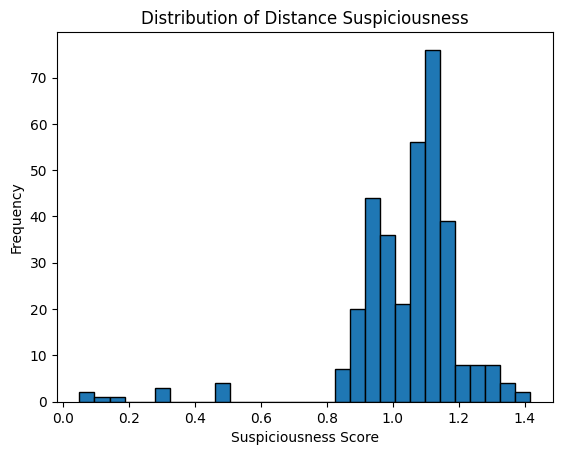

In [14]:
import matplotlib.pyplot as plt
plt.hist(housing_data['Distance Suspiciousness'], bins=30, edgecolor='black')
# Add titles and labels
plt.title('Distribution of Distance Suspiciousness')
plt.xlabel('Suspiciousness Score')
plt.ylabel('Frequency')

# Show the plot
plt.show()



In [15]:
import numpy as np
import pandas as pd

# Assuming your dataset has already been loaded as housing_data_ratios
# If not, load the dataset (replace 'file_path' with the actual file path)
# housing_data_ratios = housing_data.copy()

# Check for duplicate column names
print("Checking for duplicate column names...")
if housing_data.columns.duplicated().any():
    print("Duplicate columns detected:")
    # Get a list of all columns with duplicates
    duplicate_columns = housing_data.columns[housing_data.columns.duplicated()].tolist()
    print("Duplicate columns:", duplicate_columns)
    
    # Remove duplicates by dropping the duplicated columns
    housing_data = housing_data.loc[:, ~housing_data.columns.duplicated()]
    print("Duplicate columns removed. Proceeding with the calculation.")
else:
    print("No duplicate columns found. Proceeding with the calculation.")


Checking for duplicate column names...
Duplicate columns detected:
Duplicate columns: ['Bedrooms Total', 'Bathrooms Total']
Duplicate columns removed. Proceeding with the calculation.


In [16]:

housing_data_ratios = housing_data.copy()
# Create a small constant to avoid division by zero in case of missing or zero values
small_constant = 1e-6


In [17]:

# Step 1: Calculate Price Ratios
# --------------------------------
# 1. Price per Bedroom
housing_data_ratios['Price per Bedroom'] = housing_data_ratios['List Price'] / (housing_data_ratios['Bedrooms Total'] + small_constant)

# 2. Price per Full Bathroom
housing_data_ratios['Price per Bathroom Full'] = housing_data_ratios['List Price'] / (housing_data_ratios['Bathrooms Full'] + small_constant)

# 3. Price per Total Bathroom (including half bathrooms)
housing_data_ratios['Price per Bathroom Total'] = housing_data_ratios['List Price'] / (housing_data_ratios['Bathrooms Total'] + small_constant)

# 4. Price per Living Area (per square foot)
housing_data_ratios['Price per Living Area'] = housing_data_ratios['List Price'] / (housing_data_ratios['Living Area'] + small_constant)

# 5. Price per Lot Size Acres
housing_data_ratios['Price per Lot Size Acres'] = housing_data_ratios['List Price'] / (housing_data_ratios['Lot Size Acres'] + small_constant)

# 6. Price per Garage Space
housing_data_ratios['Price per Garage Space'] = housing_data_ratios['List Price'] / (housing_data_ratios['Garage Spaces'] + small_constant)

# 7. Price per Stories (floors)
housing_data_ratios['Price per Stories'] = housing_data_ratios['List Price'] / (housing_data_ratios['Stories Total'] + small_constant)

# 8. Price adjusted for property age (Price per Year Built)
# Current year (adjust to the current year you're using)
current_year = 2024
housing_data_ratios['Price per Year Built'] = housing_data_ratios['List Price'] / (current_year - housing_data_ratios['Year Built'] + small_constant)

# Step 2: Apply Exponential Transformation to Highlight Outliers
# --------------------------------------------------------------
# Applying exponential transformation to the price ratios to highlight extreme values (potential anomalies)

housing_data_ratios['Exp Price per Bedroom'] = np.exp(housing_data_ratios['Price per Bedroom'])
housing_data_ratios['Exp Price per Bathroom Full'] = np.exp(housing_data_ratios['Price per Bathroom Full'])
housing_data_ratios['Exp Price per Bathroom Total'] = np.exp(housing_data_ratios['Price per Bathroom Total'])
housing_data_ratios['Exp Price per Living Area'] = np.exp(housing_data_ratios['Price per Living Area'])
housing_data_ratios['Exp Price per Lot Size Acres'] = np.exp(housing_data_ratios['Price per Lot Size Acres'])
housing_data_ratios['Exp Price per Garage Space'] = np.exp(housing_data_ratios['Price per Garage Space'])
housing_data_ratios['Exp Price per Stories'] = np.exp(housing_data_ratios['Price per Stories'])
housing_data_ratios['Exp Price per Year Built'] = np.exp(housing_data_ratios['Price per Year Built'])

# Step 3: Verify the updated dataframe
# ------------------------------------
# Check the first few rows to ensure the columns have been added correctly
# print("Displaying the updated dataframe with new price ratio columns and exponential transformations:")
housing_data_ratios.info()


<class 'pandas.core.frame.DataFrame'>
Index: 340 entries, 24 to 1745
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   List Price                       340 non-null    int64  
 1   Bedrooms Total                   340 non-null    int64  
 2   Bathrooms Total                  340 non-null    int64  
 3   Living Area                      340 non-null    float64
 4   MLS Area Major                   340 non-null    int64  
 5   Year Built                       340 non-null    int64  
 6   Lot Size Acres                   340 non-null    float64
 7   Days on Market                   340 non-null    int64  
 8   Non-Representative Compensation  340 non-null    float64
 9   Stories Total                    340 non-null    float64
 10  Stories                          340 non-null    float64
 11  Bathrooms Full                   340 non-null    int64  
 12  Bathrooms Half           

/Users/annubaka/Documents/AI_For_Good_24/2024-AI4Good-Hackathon/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/annubaka/Documents/AI_For_Good_24/2024-AI4Good-Hackathon/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/annubaka/Documents/AI_For_Good_24/2024-AI4Good-Hackathon/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/annubaka/Documents/AI_For_Good_24/2024-AI4Good-Hackathon/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/annubaka/Documents/AI_For_Good_24/2024-AI4Good-Hackathon/.venv/lib/python3.12/site-packag